# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Pretty print
from pprint import pprint

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
city_count = len(cities)
city_count

641

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# url = "http://api.openweathermap.org/data/2.5/weather?q={cities}&appid={api_keys}"
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

weather_data = []
for x in range(city_count): 
    city = cities[x]
    query_url = f"{base_url}appid={weather_api_key}&q={city}&units={units}"
    print(f"Processing Record {x} of {city_count} | {city}")
    weather_response = requests.get(query_url)        
    # Save post's JSON
    if weather_response.status_code == 200:
        current_data = weather_response.json()
        result_dict = {
            'City': city,
            'Lat': current_data['coord']['lat'],
            'Lng': current_data['coord']['lon'],
            'Max Temp': current_data['main']['temp_max'],
            'Humidity': current_data['main']['humidity'],
            'Cloudiness': current_data['clouds']['all'],
            'Wind Speed': current_data['wind']['speed'],
            'Country': current_data['sys']['country'],
            'Date': current_data['dt']            
            }
        weather_data.append(result_dict)
    else:
        print(f"Error Processing Record {x} of {city_count} | {city} | {query_url}")

Processing Record 0 of 641 | hervey bay
Processing Record 1 of 641 | belmonte
Processing Record 2 of 641 | punta arenas
Processing Record 3 of 641 | geraldton
Processing Record 4 of 641 | oranjemund
Processing Record 5 of 641 | kupino
Processing Record 6 of 641 | esperance
Processing Record 7 of 641 | tawkar
Error Processing Record 7 of 641 | tawkar | http://api.openweathermap.org/data/2.5/weather?appid=bcd4a065b78379f95149cf19154c35eb&q=tawkar&units=imperial
Processing Record 8 of 641 | rikitea
Processing Record 9 of 641 | hermanus
Processing Record 10 of 641 | chokurdakh
Processing Record 11 of 641 | victoria
Processing Record 12 of 641 | santa isabel do rio negro
Processing Record 13 of 641 | taolanaro
Error Processing Record 13 of 641 | taolanaro | http://api.openweathermap.org/data/2.5/weather?appid=bcd4a065b78379f95149cf19154c35eb&q=taolanaro&units=imperial
Processing Record 14 of 641 | verkhnevilyuysk
Processing Record 15 of 641 | borgomanero
Processing Record 16 of 641 | namata

Processing Record 159 of 641 | new norfolk
Processing Record 160 of 641 | mahebourg
Processing Record 161 of 641 | mehran
Processing Record 162 of 641 | torbay
Processing Record 163 of 641 | bud
Processing Record 164 of 641 | rondonopolis
Processing Record 165 of 641 | gemena
Processing Record 166 of 641 | norman wells
Processing Record 167 of 641 | northam
Processing Record 168 of 641 | hobart
Processing Record 169 of 641 | berlevag
Processing Record 170 of 641 | mys shmidta
Error Processing Record 170 of 641 | mys shmidta | http://api.openweathermap.org/data/2.5/weather?appid=bcd4a065b78379f95149cf19154c35eb&q=mys shmidta&units=imperial
Processing Record 171 of 641 | envira
Processing Record 172 of 641 | coos bay
Processing Record 173 of 641 | yirol
Error Processing Record 173 of 641 | yirol | http://api.openweathermap.org/data/2.5/weather?appid=bcd4a065b78379f95149cf19154c35eb&q=yirol&units=imperial
Processing Record 174 of 641 | mvuma
Processing Record 175 of 641 | cortez
Processin

Processing Record 310 of 641 | primorka
Processing Record 311 of 641 | tiksi
Processing Record 312 of 641 | vila franca do campo
Processing Record 313 of 641 | debica
Processing Record 314 of 641 | tongzi
Processing Record 315 of 641 | talnakh
Processing Record 316 of 641 | ryotsu
Processing Record 317 of 641 | rehoboth
Processing Record 318 of 641 | ostrovnoy
Processing Record 319 of 641 | hatillo
Processing Record 320 of 641 | vardo
Processing Record 321 of 641 | san andres
Processing Record 322 of 641 | antofagasta
Processing Record 323 of 641 | naranjal
Processing Record 324 of 641 | young
Processing Record 325 of 641 | klaksvik
Processing Record 326 of 641 | porto walter
Processing Record 327 of 641 | grand river south east
Error Processing Record 327 of 641 | grand river south east | http://api.openweathermap.org/data/2.5/weather?appid=bcd4a065b78379f95149cf19154c35eb&q=grand river south east&units=imperial
Processing Record 328 of 641 | meybod
Processing Record 329 of 641 | cama

Processing Record 469 of 641 | taoudenni
Processing Record 470 of 641 | abu kamal
Processing Record 471 of 641 | halalo
Error Processing Record 471 of 641 | halalo | http://api.openweathermap.org/data/2.5/weather?appid=bcd4a065b78379f95149cf19154c35eb&q=halalo&units=imperial
Processing Record 472 of 641 | tarudant
Error Processing Record 472 of 641 | tarudant | http://api.openweathermap.org/data/2.5/weather?appid=bcd4a065b78379f95149cf19154c35eb&q=tarudant&units=imperial
Processing Record 473 of 641 | la gomera
Processing Record 474 of 641 | nuuk
Processing Record 475 of 641 | maniitsoq
Processing Record 476 of 641 | torit
Processing Record 477 of 641 | takayama
Processing Record 478 of 641 | gamba
Processing Record 479 of 641 | pueblo nuevo
Processing Record 480 of 641 | dunedin
Processing Record 481 of 641 | joshimath
Processing Record 482 of 641 | leningradskiy
Processing Record 483 of 641 | shirokiy
Processing Record 484 of 641 | fairbanks
Processing Record 485 of 641 | petropavlov

Processing Record 628 of 641 | bocaiuva
Processing Record 629 of 641 | callaway
Processing Record 630 of 641 | cumaribo
Error Processing Record 630 of 641 | cumaribo | http://api.openweathermap.org/data/2.5/weather?appid=bcd4a065b78379f95149cf19154c35eb&q=cumaribo&units=imperial
Processing Record 631 of 641 | puerto carreno
Processing Record 632 of 641 | asmar
Processing Record 633 of 641 | kyakhta
Processing Record 634 of 641 | stranda
Processing Record 635 of 641 | ustupo
Processing Record 636 of 641 | chernyshevskiy
Processing Record 637 of 641 | bida
Processing Record 638 of 641 | tahta
Processing Record 639 of 641 | andenes
Processing Record 640 of 641 | sindor


In [4]:
# json pretty print
print(json.dumps(current_data, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 62.8629,
        "lon": 51.8905
    },
    "dt": 1619496248,
    "id": 492860,
    "main": {
        "feels_like": 31.69,
        "grnd_level": 984,
        "humidity": 97,
        "pressure": 1002,
        "sea_level": 1002,
        "temp": 35.51,
        "temp_max": 35.51,
        "temp_min": 35.51
    },
    "name": "Sindor",
    "sys": {
        "country": "RU",
        "sunrise": 1619483174,
        "sunset": 1619541219
    },
    "timezone": 10800,
    "visibility": 33,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 280,
        "gust": 13.71,
        "speed": 4.45
    }
}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df = pd.DataFrame(weather_data)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hervey bay,-25.2986,152.8535,73.00,63,52,8.01,AU,1619495977
1,belmonte,-15.8631,-38.8828,75.20,78,20,5.75,BR,1619495978
2,punta arenas,-53.1500,-70.9167,44.60,93,90,5.75,CL,1619495978
3,geraldton,-28.7667,114.6000,87.80,20,20,3.44,AU,1619495979
4,oranjemund,-28.5500,16.4333,59.04,86,79,5.12,NA,1619495979


In [6]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,593.000000,593.000000,593.000000,593.000000,593.000000,593.00000,5.930000e+02
mean,21.577990,16.252968,59.385936,70.445194,54.730185,7.33253,1.619496e+09
std,33.343157,89.864860,19.473341,22.306240,38.191349,4.75671,9.371155e+01
min,-54.800000,-179.166700,7.000000,1.000000,0.000000,0.36000,1.619496e+09
25%,-5.250000,-65.019200,42.800000,58.000000,17.000000,3.44000,1.619496e+09
50%,27.257400,23.450000,62.010000,75.000000,64.000000,6.20000,1.619496e+09
75%,50.249900,91.641900,75.560000,88.000000,91.000000,10.11000,1.619496e+09
max,78.218600,179.316700,99.280000,100.000000,100.000000,33.22000,1.619496e+09


In [7]:
# Write API Results to CSV
weather_df.to_csv("output_data_file", encoding="utf-8", index=False, header=True)

# output_data_file = "output_data/cities.csv"


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
weather_df_filtered = weather_df[weather_df['Humidity'] > 100]
weather_df_filtered # No cities with humidity greater than 100% exist


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_df.head() #Skipping step since there are no cities with humidity greater than 100% in dataset

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hervey bay,-25.2986,152.8535,73.00,63,52,8.01,AU,1619495977
1,belmonte,-15.8631,-38.8828,75.20,78,20,5.75,BR,1619495978
2,punta arenas,-53.1500,-70.9167,44.60,93,90,5.75,CL,1619495978
3,geraldton,-28.7667,114.6000,87.80,20,20,3.44,AU,1619495979
4,oranjemund,-28.5500,16.4333,59.04,86,79,5.12,NA,1619495979


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

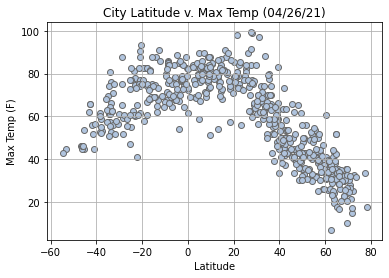

In [10]:
plt.scatter(weather_df['Lat'],weather_df['Max Temp'], color = 'lightsteelblue', edgecolors="dimgray")
plt.title("City Latitude v. Max Temp (04/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid()
plt.savefig("Images/lat_v_maxtemp.png")
plt.show()

## Latitude vs. Humidity Plot

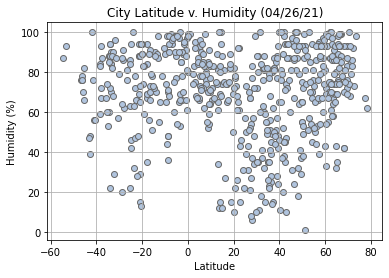

In [11]:
plt.scatter(weather_df['Lat'],weather_df['Humidity'], color = 'lightsteelblue', edgecolors="dimgray")
plt.title("City Latitude v. Humidity (04/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("Images/lat_v_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

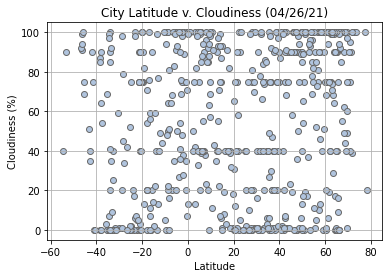

In [12]:
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'], color = 'lightsteelblue', edgecolors="dimgray")
plt.title("City Latitude v. Cloudiness (04/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("Images/lat_v_cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

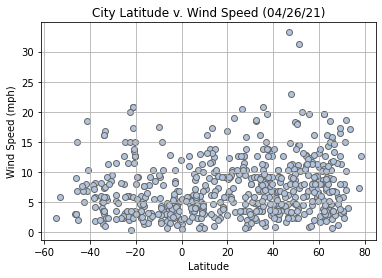

In [13]:
plt.scatter(weather_df['Lat'],weather_df['Wind Speed'], color = 'lightsteelblue', edgecolors="dimgray")
plt.title("City Latitude v. Wind Speed (04/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("Images/lat_v_windspeed.png")
plt.show()

## Linear Regression

In [14]:
weather_df_north = weather_df[weather_df['Lat'] >= 0]
weather_df_north.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
5,kupino,54.3663,77.2981,51.58,67,100,12.84,RU,1619495979
9,chokurdakh,70.6333,147.9167,27.91,84,95,3.18,RU,1619495981
10,victoria,22.2855,114.1577,75.00,92,100,5.01,HK,1619495825
12,verkhnevilyuysk,63.4453,120.3167,23.27,67,100,10.36,RU,1619495982
13,borgomanero,45.7024,8.4581,50.00,95,100,1.61,IT,1619495983


In [15]:
weather_df_south = weather_df[weather_df['Lat'] <= 0]
weather_df_south.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hervey bay,-25.2986,152.8535,73.00,63,52,8.01,AU,1619495977
1,belmonte,-15.8631,-38.8828,75.20,78,20,5.75,BR,1619495978
2,punta arenas,-53.1500,-70.9167,44.60,93,90,5.75,CL,1619495978
3,geraldton,-28.7667,114.6000,87.80,20,20,3.44,AU,1619495979
4,oranjemund,-28.5500,16.4333,59.04,86,79,5.12,NA,1619495979


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.885289951669311


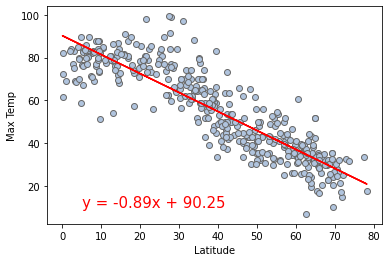

In [16]:
x_values = weather_df_north['Lat']
y_values = weather_df_north['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = 'lightsteelblue', edgecolors="dimgray")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.savefig("Images/temp_v_lat_north_regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6571414796379393


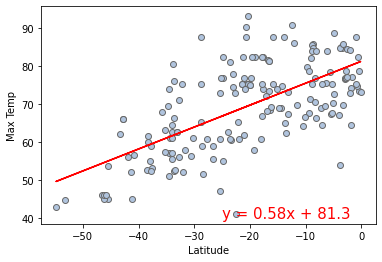

In [17]:
x_values = weather_df_south['Lat']
y_values = weather_df_south['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = 'lightsteelblue', edgecolors="dimgray")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.savefig("Images/temp_v_lat_south_regression.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.12581459008305504


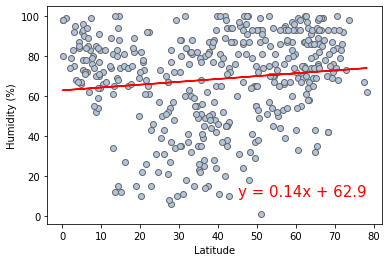

In [18]:
x_values = weather_df_north['Lat']
y_values = weather_df_north['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = 'lightsteelblue', edgecolors="dimgray")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")
plt.savefig("Images/hum_v_lat_north_regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.15621912804975943


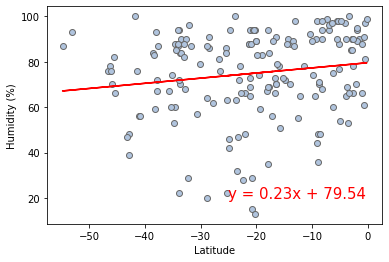

In [19]:
x_values = weather_df_south['Lat']
y_values = weather_df_south['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = 'lightsteelblue', edgecolors="dimgray")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")
plt.savefig("Images/hum_v_lat_south_regression.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1303674773843635


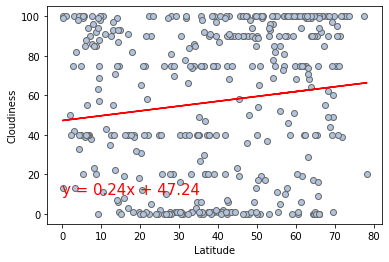

In [20]:
x_values = weather_df_north['Lat']
y_values = weather_df_north['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = 'lightsteelblue', edgecolors="dimgray")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.savefig("Images/cloud_v_lat_north_regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.12815244311378343


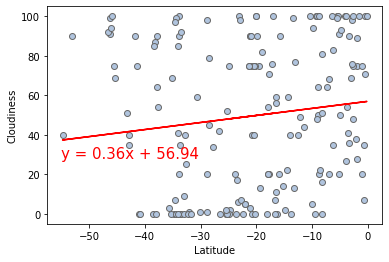

In [21]:
x_values = weather_df_south['Lat']
y_values = weather_df_south['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = 'lightsteelblue', edgecolors="dimgray")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,28),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.savefig("Images/cloud_v_lat_south_regression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.15217419605036936


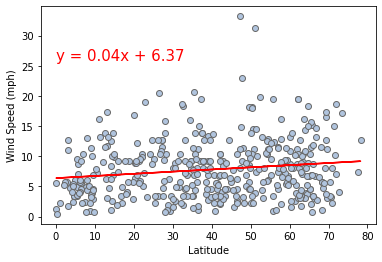

In [22]:
x_values = weather_df_north['Lat']
y_values = weather_df_north['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = 'lightsteelblue', edgecolors="dimgray")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,26),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue}")
plt.savefig("Images/wind_v_lat_north_regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.14438440630328495


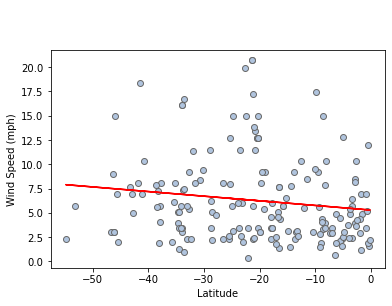

In [23]:
x_values = weather_df_south['Lat']
y_values = weather_df_south['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = 'lightsteelblue', edgecolors="dimgray")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue}")
plt.savefig("Images/wind_v_lat_south_regression.png")
plt.show()

## Analysis

<blockquote>From analyzing the regression line, there is clear correlation between distance from the equator and the max temperature in a given region.  However, there seems to be little relationship, if any, between the distance from the equator and humidity, cloudiness, or wind speed.  We can therefore conclude that it is indeed “hotter” the closer one gets to the equator, but other climate factors that we reviewed have no relationship with a city’s distance from the equator.</blockquote>